In [1]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import face_recognition

# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
ratings = pd.read_excel('./SCUT-FBP5500_v2/All_Ratings.xlsx')

filenames = ratings.groupby('Filename').size().index.tolist()

labels = []

for filename in filenames:
    df = ratings[ratings['Filename'] == filename]
    score = round(df['Rating'].mean(), 2)
    labels.append({'Filename': filename, 'score': score})

labels_df = pd.DataFrame(labels)

In [3]:
labels_df

Filename  score
0        AF1.jpg   2.33
1       AF10.jpg   3.43
2      AF100.jpg   2.90
3     AF1000.jpg   3.97
4     AF1001.jpg   3.73
...          ...    ...
5495    CM95.jpg   2.13
5496    CM96.jpg   3.05
5497    CM97.jpg   3.05
5498    CM98.jpg   2.40
5499    CM99.jpg   2.67

[5500 rows x 2 columns]

In [4]:
labels_df[labels_df['score'] >= 4.6]

Filename  score
1082  AF1973.jpg   4.75
2695  AM1624.jpg   4.67
2931  AM1837.jpg   4.65
2932  AM1838.jpg   4.60
3135    AM22.jpg   4.70
3324   AM390.jpg   4.68
4566   CF609.jpg   4.70
4594   CF634.jpg   4.63
4601   CF640.jpg   4.65
4609   CF648.jpg   4.65
4631   CF668.jpg   4.60
4688   CF719.jpg   4.60

In [5]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img

img_width, img_height, channels = 350, 350, 3
sample_dir = './SCUT-FBP5500_v2/Images/'
nb_samples = len(os.listdir(sample_dir))
input_shape = (img_width, img_height, channels)

x_total = np.empty((nb_samples, img_width, img_height, channels), dtype=np.float32)
y_total = np.empty((nb_samples, 1), dtype=np.float32)

for i, fn in enumerate(os.listdir(sample_dir)):
    img = load_img('%s/%s' % (sample_dir, fn))
    # img = tf.keras.utils.load_img('%s/%s' % (sample_dir, fn))
    x = tf.keras.utils.img_to_array(img).reshape(img_height, img_width, channels)
    x = x.astype('float32') / 255.
    y = labels_df[labels_df.Filename == fn].score.values
    y = y.astype('float32')
    x_total[i] = x
    y_total[i] = y

In [6]:
seed = 42
x_train_all, x_test, y_train_all, y_test = train_test_split(x_total, y_total, test_size=0.2, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=seed)

In [14]:
# from tensorflow.keras.backend import clear_session
# from tensorflow.keras.backend import set_session
# from tensorflow.keras.backend import get_session
import gc

# def reset():
#     sess = tf.keras.backend.get_session()
#     tf.keras.backend.clear_session()
#     sess.close()
#     sess = tf.keras.backend.get_session()

#     try:
        

In [6]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.models import load_model
from keras.models import Sequential
from keras.applications import ResNet50
from keras.layers import Dense

resnet = ResNet50(include_top=False, pooling='avg', input_shape=input_shape)
model = Sequential()
model.add(resnet)
model.add(Dense(1))
model.layers[0].trainable = False




filepath="./model/{epoch:02d}-{val_loss:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)
callback_list = [checkpoint, reduce_learning_rate]

model.layers[0].trainable = True
model.compile(loss='mse', optimizer='adam')

history = model.fit(x=x_train, 
                    y=y_train, 
                    batch_size=8,
                    epochs=30,
                    validation_data=(x_val, y_val),
                    callbacks=callback_list)
                    


Epoch 1/30
115/440 [======>.......................] - ETA: 16:30 - loss: 1.1727

In [8]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
# from scipy.misc import imresize
import numpy as np


new_model = tf.keras.models.load_model('./model/AllData/25-0.12.h5')
# best_model = load_model('./01.h5')



In [9]:
new_model.evaluate(x_test, y_test)

35/35 [==============================] - 90s 3s/step - loss: 0.1139


0.11393491178750992

35/35 [==============================] - 90s 3s/step


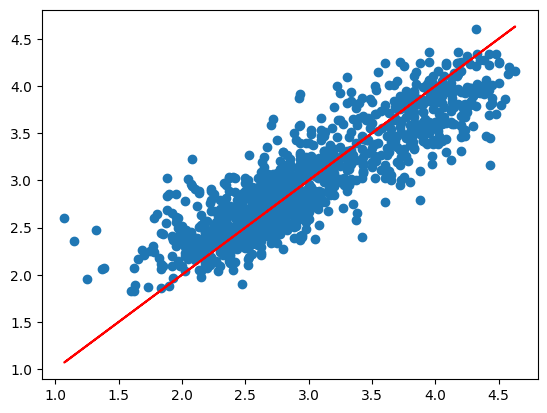

In [10]:
plt.scatter(y_test, new_model.predict(x_test))
plt.plot(y_test, y_test, color='red')

In [11]:
path = './IMG/Original/IMG/'
imgs = [f for f in os.listdir(path)]
imgs

['100_1738106273409.jpg',
 '101_30000004701273.jpg',
 '102_30000002795148.jpg',
 '103_1722263773413.jpg',
 '104_30000004115069.jpg',
 '105_30000006702021.jpg',
 '106_30000004028035.jpg',
 '107_1753213767113.jpg',
 '10_20000000752193.jpg',
 '11_30000002792212.jpg',
 '12_20000000370926.jpg',
 '13_20000001909949.jpg',
 '14_1843015066661.jpg',
 '15_20000001266128.jpg',
 '16_1851612270771.jpg',
 '17_30000005251927.jpg',
 '18_30000001752954.jpg',
 '19_20000000062447.jpg',
 '1_20000000140822.jpg',
 '20_20000002699107.jpg',
 '21_20000001085514.jpg',
 '22_30000002845418.jpg',
 '23_20000001776949.jpg',
 '24_20000000116339.jpg',
 '25_30000003330811.jpg',
 '26_20000001578983.jpg',
 '27_30000006428684.jpg',
 '28_30000005517263.jpg',
 '29_20000000673941.jpg',
 '2_1728605503407.jpg',
 '30_20000000572975.jpg',
 '31_20000001951507.jpg',
 '32_1738648963409.jpg',
 '33_1729148483433.jpg',
 '34_1731074153446.jpg',
 '35_30000004670001.jpg',
 '36_1733510743483.jpg',
 '37_30000000677578.jpg',
 '38_30000002228

In [ ]:
from PIL import Image

def resize_image(input_image_path, output_image_path, target_width=None, target_height=None):
    with Image.open(input_image_path) as img:
        width, height = img.size
        
        # 如果提供了目标宽度和目标高度中的任意一个
        if target_width and not target_height:  # 只指定宽度
            aspect_ratio = height / width
            new_height = int(target_width * aspect_ratio)
            new_size = (target_width, new_height)
        elif target_height and not target_width:  # 只指定高度
            aspect_ratio = width / height
            new_width = int(target_height * aspect_ratio)
            new_size = (new_width, target_height)
        else:  # 如果两者都未指定，返回原尺寸
            new_size = (width, height)
        
        # 调整图像大小并保存
        resized_img = img.resize(new_size, Image.ANTIALIAS)
        resized_img.save(output_image_path)
        print("Resized image saved as:", output_image_path)

# 调用函数
resize_image('./IMG/104_M1.png', './resized_104_M1.png', target_width=500)  # 只指定新的宽度


In [12]:
from PIL import Image

# 打开图像文件
img = Image.open('./SCUT-FBP5500_v2/Images/AF1.jpg')

# 获取图像的尺寸
width, height = img.size

print("Width:", width)
print("Height:", height)

Width: 350
Height: 350


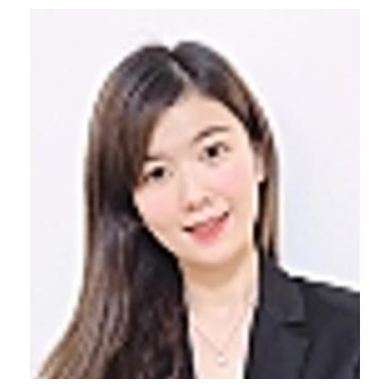

1/1 [==============================] - 0s 140ms/step
顏值: 3.173337


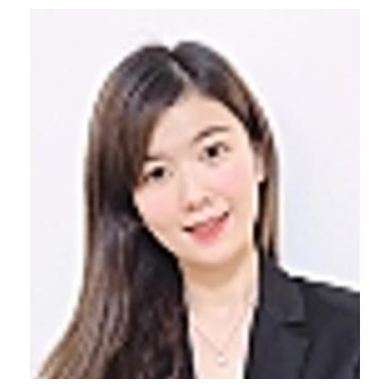

In [113]:
from tensorflow.keras.utils import img_to_array

img = load_img('./IMG/test_resized_padded_image.jpg')
# img = load_img('./IMG/zhendonghu.jpg')

plt.axis('off')
plt.imshow(img)
plt.show()
img_width, img_height, channels = 350, 350, 3

# 使用Pillow的resize方法调整图像大小
img_resized = img.resize((img_width, img_height))
plt.axis('off')
plt.imshow(img_resized)

# 将图像转换为数组并重新整理形状，归一化像素值
img_array = img_to_array(img_resized)
img_array = img_array.reshape((1, img_height, img_width, channels))
img_array = img_array / 255.0

# 使用模型进行预测
predict = new_model.predict(img_array)
print('顏值:', predict[0][0])


1/1 [==============================] - 0s 137ms/step
predict,  3.5499113
1/1 [==============================] - 0s 136ms/step
predict,  3.1262689
1/1 [==============================] - 0s 131ms/step
predict,  2.7746484
1/1 [==============================] - 0s 147ms/step
predict,  2.7510939
1/1 [==============================] - 0s 130ms/step
predict,  3.2788045
1/1 [==============================] - 0s 125ms/step
predict,  3.1419325
1/1 [==============================] - 0s 141ms/step
predict,  2.7706249
1/1 [==============================] - 0s 131ms/step
predict,  2.8546846
1/1 [==============================] - 0s 126ms/step
predict,  2.961349
1/1 [==============================] - 0s 130ms/step
predict,  2.665122
1/1 [==============================] - 0s 132ms/step
predict,  2.9130402
1/1 [==============================] - 0s 139ms/step
predict,  3.1919003
1/1 [==============================] - 0s 127ms/step
predict,  2.756671
1/1 [==============================] - 0s 125ms/step
p

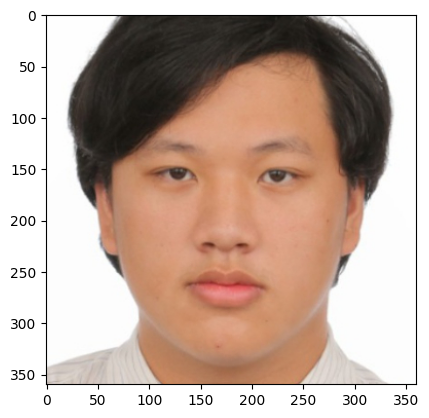

In [41]:
from tensorflow.keras.utils import img_to_array
from PIL import Image

path = './IMG/Original/IMG/Preprocessed/'
imgs = [f for f in os.listdir(path)]
for i in imgs:
    img = load_img(path + i)
    plt.imshow(img)




    # 使用Pillow的resize方法调整图像大小
    img_resized = img.resize((img_width, img_height))

    # 将图像转换为数组并重新整理形状，归一化像素值
    img_array = img_to_array(img_resized)
    img_array = img_array.reshape((1, img_height, img_width, channels))
    img_array = img_array / 255.0

    # 使用模型进行预测
    predict = new_model.predict(img_array)
    print('predict, ', predict[0][0])
    score = round(predict[0][0], 2)
    img.save('./IMG/Scored/'+ str(score) +'_'+ i  + '.png')



In [88]:
import face_recognition
from math import sqrt
import pandas as pd


image = face_recognition.load_image_file("./IMG/eye_distance/"+ "AM1708.jpg")
face_landmarks_list = face_recognition.face_landmarks(image)
print(face_landmarks_list)
print(face_landmarks_list[0]['left_eye'])
print(face_landmarks_list[0]['right_eye'])

[{'chin': [(88, 160), (89, 184), (90, 207), (94, 231), (102, 253), (117, 273), (136, 290), (158, 305), (182, 308), (203, 306), (219, 292), (232, 276), (243, 258), (250, 238), (255, 217), (259, 196), (261, 174)], 'left_eyebrow': [(111, 146), (125, 139), (142, 139), (157, 144), (173, 151)], 'right_eyebrow': [(199, 154), (214, 149), (228, 147), (242, 148), (253, 158)], 'nose_bridge': [(186, 170), (186, 186), (186, 203), (187, 219)], 'nose_tip': [(167, 230), (176, 232), (184, 234), (192, 233), (199, 231)], 'left_eye': [(126, 164), (136, 159), (149, 161), (158, 171), (146, 173), (133, 171)], 'right_eye': [(206, 174), (215, 166), (228, 165), (237, 172), (229, 177), (216, 177)], 'top_lip': [(148, 255), (162, 253), (175, 251), (183, 254), (190, 251), (200, 254), (212, 256), (208, 257), (190, 258), (183, 259), (174, 258), (153, 256)], 'bottom_lip': [(212, 256), (201, 267), (192, 272), (183, 272), (174, 271), (162, 265), (148, 255), (153, 256), (175, 259), (184, 260), (191, 259), (208, 257)]}]
[

In [89]:
# 計算眼距
import face_recognition
from math import sqrt
import pandas as pd

# imgs = [f for f in os.listdir('./IMG/eye_distance/')]
# imgs = [f for f in os.listdir('./SCUT-FBP5500_v2/Images/')]
# print(imgs)

Filenames = []
Left_eye_x_avg = []
Left_eye_y_avg = []
Right_eye_x_avg = []
Right_eye_y_avg = []
Eye_dist = []


for i in imgs:
    print(i, '-'*50)
    try:
        image = face_recognition.load_image_file("./SCUT-FBP5500_v2/Images/"+ i)
        face_landmarks_list = face_recognition.face_landmarks(image)
        print(face_landmarks_list)
        print(face_landmarks_list[0]['left_eye'])
        print(face_landmarks_list[0]['right_eye'])
        left_eye_x = [i[0] for i in face_landmarks_list[0]['left_eye']]
        left_eye_y = [i[1] for i in face_landmarks_list[0]['left_eye']]
        left_eye_x_avg = round(sum(left_eye_x)/len(left_eye_x))
        left_eye_y_avg = round(sum(left_eye_y)/len(left_eye_y))
        right_eye_x = [i[0] for i in face_landmarks_list[0]['right_eye']]
        right_eye_y = [i[1] for i in face_landmarks_list[0]['right_eye']]
        right_eye_x_avg = round(sum(right_eye_x)/len(right_eye_x))
        right_eye_y_avg = round(sum(right_eye_y)/len(right_eye_y))
        dist = sqrt((right_eye_x_avg - left_eye_x_avg)**2 + (right_eye_y_avg - left_eye_y_avg)**2)

        print('left_eye_x_avg: ', left_eye_x_avg, 'left_eye_y_avg: ', left_eye_y_avg)
        print('right_eye_x_avg: ', right_eye_x_avg, 'right_eye_y_avg: ', right_eye_y_avg)
        print('eye_dist: ', round(dist,2))
        Filenames.append(i)
        Left_eye_x_avg.append(left_eye_x_avg)
        Left_eye_y_avg.append(left_eye_y_avg)
        Right_eye_x_avg.append(right_eye_x_avg)
        Right_eye_y_avg.append(right_eye_y_avg)
        Eye_dist.append(round(dist,2))    
    except IndexError:
        pass


df = pd.DataFrame({'Filename':Filenames,
                   'left_eye_x_avg': Left_eye_x_avg,
                    'left_eye_y_avg': Left_eye_y_avg, 
                    'right_eye_x_avg': Right_eye_x_avg,
                    'right_eye_y_avg': Right_eye_y_avg,
                    'eye_dist': Eye_dist})
df.to_csv('./eye_dist.csv', index=False)

AF1.jpg --------------------------------------------------
[{'chin': [(93, 145), (96, 168), (100, 190), (104, 211), (111, 231), (123, 249), (139, 263), (158, 274), (179, 277), (200, 273), (217, 261), (232, 246), (243, 228), (249, 208), (253, 188), (256, 167), (259, 145)], 'left_eyebrow': [(111, 136), (123, 128), (138, 125), (153, 127), (167, 133)], 'right_eyebrow': [(191, 132), (205, 127), (219, 124), (234, 127), (245, 135)], 'nose_bridge': [(179, 152), (180, 166), (180, 180), (180, 194)], 'nose_tip': [(165, 204), (172, 206), (180, 207), (187, 205), (193, 203)], 'left_eye': [(130, 153), (140, 149), (150, 150), (157, 157), (148, 158), (138, 157)], 'right_eye': [(199, 157), (207, 151), (217, 150), (226, 153), (218, 158), (208, 159)], 'top_lip': [(148, 229), (161, 225), (172, 222), (180, 224), (188, 221), (198, 224), (209, 227), (205, 228), (188, 231), (180, 232), (172, 232), (153, 230)], 'bottom_lip': [(209, 227), (199, 238), (189, 243), (180, 244), (172, 243), (160, 239), (148, 229), (1

In [95]:
eye_dist_avg = df['eye_dist'].mean()
eye_dist_avg

87.84050464565495

left_eye_x_avg:  43 left_eye_y_avg:  36
right_eye_x_avg:  54 right_eye_y_avg:  32
eye_dist:  11.7


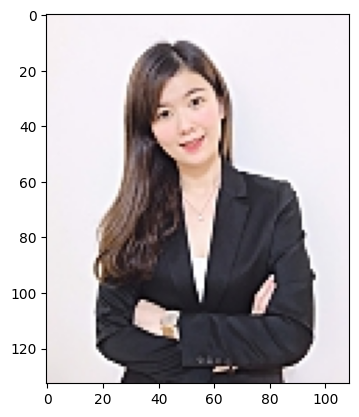

In [101]:
img = load_img('./IMG/test.jpg')

plt.imshow(img)
image = face_recognition.load_image_file('./IMG/test.jpg')
face_landmarks_list = face_recognition.face_landmarks(image)
left_eye_x = [i[0] for i in face_landmarks_list[0]['left_eye']]
left_eye_y = [i[1] for i in face_landmarks_list[0]['left_eye']]
left_eye_x_avg = round(sum(left_eye_x)/len(left_eye_x))
left_eye_y_avg = round(sum(left_eye_y)/len(left_eye_y))
right_eye_x = [i[0] for i in face_landmarks_list[0]['right_eye']]
right_eye_y = [i[1] for i in face_landmarks_list[0]['right_eye']]
right_eye_x_avg = round(sum(right_eye_x)/len(right_eye_x))
right_eye_y_avg = round(sum(right_eye_y)/len(right_eye_y))
dist = sqrt((right_eye_x_avg - left_eye_x_avg)**2 + (right_eye_y_avg - left_eye_y_avg)**2)

print('left_eye_x_avg: ', left_eye_x_avg, 'left_eye_y_avg: ', left_eye_y_avg)
print('right_eye_x_avg: ', right_eye_x_avg, 'right_eye_y_avg: ', right_eye_y_avg)
print('eye_dist: ', round(dist,2))


scale_factor:  7.5047207801720015


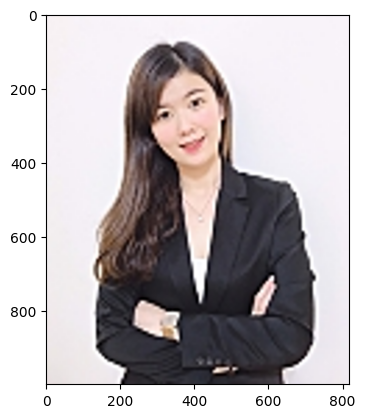

In [106]:

# 將圖片根據眼距比例縮放
def resize_image(img_path, scale_factor):
    # 打開圖片
    img = Image.open(img_path)
    
    # 計算新的尺寸
    new_width = int(img.width * scale_factor)
    new_height = int(img.height * scale_factor)
    
    # 重設圖片尺寸
    resized_img = img.resize((new_width, new_height))
    
    return resized_img

# 使用函數
img_path = './IMG/test.jpg'  # 替換為你的圖片路徑
scale_factor = eye_dist_avg/dist  # 定義放大倍率，例如1.5倍
print('scale_factor: ', scale_factor)
resized_image = resize_image(img_path, scale_factor)
resized_image.save('./IMG/test_resize.jpg')  # 保存圖片
plt.imshow(resized_image)  # 顯示圖片

[(192, 489, 415, 266)]
192 489 415 266
Width: 818 pixels
Height: 998 pixels


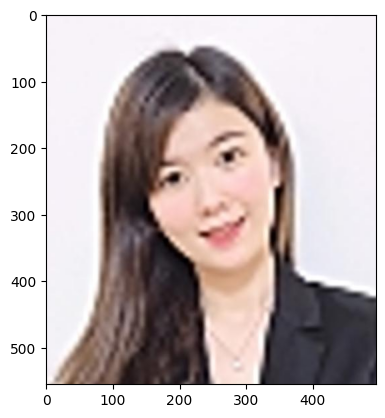

In [116]:
# 再一次使用face_recognition套件找出臉部位置
import face_recognition

path = './IMG/test_resize.jpg'

image = face_recognition.load_image_file(path)
face_locations = face_recognition.face_locations(image)
upper, right, lower, left = face_locations[0]
print(upper, right, lower, left)


image = Image.open(path)
width, height = image.size

print(f"Width: {width} pixels")
print(f"Height: {height} pixels")

revised_width = width /6
revised_height = height /6

left = left - revised_width
right = right + revised_width
upper = upper - revised_height
lower = lower + revised_height

crop_area = (left, upper, right, lower)
cropped_image = image.crop(crop_area)
cropped_image.save("./IMG/test_resize_crop.png")

plt.imshow(cropped_image)

In [111]:
# 裁切成350*350並補白底
from PIL import Image

def resize_and_pad(img_path, new_height, color=(255, 255, 255)):
    # 打開圖片
    img = Image.open(img_path)
    
    # 計算新寬度以保持比例
    original_height = img.height
    original_width = img.width
    aspect_ratio = original_width / original_height
    new_width = int(new_height * aspect_ratio)
    
    # 調整圖片大小
    resized_img = img.resize((new_width, new_height))
    
    # 計算新圖片的寬度以補全白底
    if new_width < 350:
        # 創建一個新的圖片，寬度為350，高度不變，背景為白色
        final_img = Image.new("RGB", (350, new_height), color)
        # 計算放置調整後圖片的起始x坐標（使其居中）
        x_offset = (350 - new_width) // 2
        # 將調整後的圖片貼到新的白色背景圖片上
        final_img.paste(resized_img, (x_offset, 0))
    else:
        final_img = resized_img

    return final_img

# 使用函數
img_path = "./IMG/test_resize_crop.png"  # 替換為你的圖片路徑
resized_padded_image = resize_and_pad(img_path, 350)
resized_padded_image.show()  # 顯示圖片
resized_padded_image.save("./IMG/test_resized_padded_image.jpg")  # 保存圖片


[(67, 253, 196, 124)]
67 253 196 124
Width: 360 pixels
Height: 360 pixels
[(80, 211, 187, 103)]
80 211 187 103
Width: 360 pixels
Height: 360 pixels
[(177, 211, 239, 149)]
177 211 239 149
Width: 360 pixels
Height: 360 pixels
[(30, 69, 66, 33)]
30 69 66 33
Width: 110 pixels
Height: 117 pixels
[(96, 239, 225, 110)]
96 239 225 110
Width: 360 pixels
Height: 360 pixels
[(92, 235, 199, 127)]
92 235 199 127
Width: 360 pixels
Height: 360 pixels
[(118, 291, 341, 68)]
118 291 341 68
Width: 360 pixels
Height: 360 pixels
[(128, 247, 235, 139)]
128 247 235 139
Width: 360 pixels
Height: 360 pixels
[(130, 212, 204, 137)]
130 212 204 137
Width: 360 pixels
Height: 360 pixels
[(118, 262, 304, 77)]
118 262 304 77
Width: 360 pixels
Height: 360 pixels
[(64, 236, 219, 81)]
64 236 219 81
Width: 360 pixels
Height: 360 pixels
[(118, 262, 304, 77)]
118 262 304 77
Width: 360 pixels
Height: 360 pixels
[(22, 69, 58, 33)]
22 69 58 33
Width: 109 pixels
Height: 133 pixels
[(98, 270, 253, 115)]
98 270 253 115
Width: 36

IndexError: list index out of range

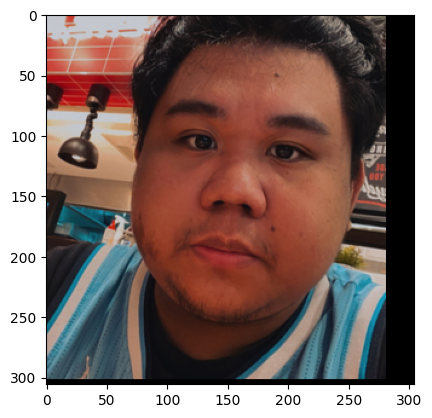

In [54]:
import face_recognition

path = './IMG/Original/IMG/'
imgs = [f for f in os.listdir(path)]

for i in imgs:
    img = load_img(path + i)


    # img_name = 'PONG'
    image = face_recognition.load_image_file(path + i)
    face_locations = face_recognition.face_locations(image)


    print(face_locations)

    upper, right, lower, left = face_locations[0]
    print(upper, right, lower, left)



    image = Image.open(path + i)

    width, height = image.size

    print(f"Width: {width} pixels")
    print(f"Height: {height} pixels")

    revised_width = width /6
    revised_height = height /6

    # left = left - 10
    # right = right + 10
    # upper = upper - 10
    # lower = lower + 10
    left = left - revised_width
    right = right + revised_width
    upper = upper - revised_height
    lower = lower + revised_height

    crop_area = (left, upper, right, lower)



    cropped_image = image.crop(crop_area)
    cropped_image.save("./IMG/Croped/"+ i +"_crop.png")

    plt.imshow(cropped_image)

In [55]:
def resize_and_pad(img_path, new_width, new_height, color=(255, 255, 255)):
    # 打開圖片
    img = Image.open(img_path)
    
    # 计算居中时的起始坐标
    x = (new_width - img.width) // 2
    y = (new_height - img.height) // 2

    # 創建一個新的圖片用於輸出，初始化背景色為白色
    new_img = Image.new("RGB", (new_width, new_height), color)
    
    # 將原圖片貼到新圖片的指定位置
    new_img.paste(img, (x, y))
    
    return new_img

# 使用函数
img_path = "./IMG/10_crop.png"  # 替換為你的圖片路徑
new_image = resize_and_pad(img_path, 350, 350)
new_image.imshow()  # 顯示圖片
new_image.save("./IMG/10_cropResized_image.jpg")  # 保存圖片

